<a href="https://colab.research.google.com/github/jatbhoir/Machine-Learning/blob/master/Insurance_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

*To predict the approximate insurance cost based upon the rest of the features provided for each individual.*
---
---

Consider the data present in the Insurance dataset file.
Following is the attribute related information:
* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking, yes or no
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance


Import Requirement Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

Mounting GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read CSV

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/SEM2/Banking/datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [ ]:
data.size

9366

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Making copy of original DataFrame
original_data = data
original_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Preprocessing [Data Cleaning]

In [ ]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Converting Categorical Data
1. Sex: Female - 0, Male - 1
2. Smoker: No - 0, Yes - 1
3. Region: northeast - 0, northwest - 1, southeast - 2, southwest - 3

In [ ]:
data['sex'].replace(['female', 'male'], [0, 1], inplace = True)
data['smoker'].replace(['no', 'yes'], [0, 1],  inplace = True)
data['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Creating X and Y

In [ ]:
x = data.drop(columns = 'charges')
y = data['charges']

Training_Testing Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = None, random_state = 0)

In [ ]:
print(f'x: {x.shape}, y:{y.shape}')
print(f'X_train: {X_train.shape}, y_train:{y_train.shape}')
print(f'X_test: {X_test.shape}, y_test:{y_test.shape}')

x: (1338, 6), y:(1338,)
X_train: (1003, 6), y_train:(1003,)
X_test: (335, 6), y_test:(335,)


Models

---

Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR.score(X_test, y_test)

0.7962732059725786

In [ ]:
print(f'Slope (A): {LR.coef_},\nIntercept (B): {LR.intercept_}')

Slope (A): [ 2.50537556e+02  3.65092141e+00  3.22881906e+02  4.50147445e+02
  2.36021161e+04 -3.41244000e+02],
Intercept (B): -11261.138825163935


In [ ]:
trasposed = (LR.coef_).T
coeff = pd.DataFrame(trasposed, index = X_train.columns, columns = ['Coefficients']).sort_values('Coefficients', ascending = False)

In [ ]:
# Linear Equation [y = sum (a*x(i)) + b]
charges = ''
for i in range(len(coeff['Coefficients'].values)):
    row = coeff.index[i]
    value = coeff['Coefficients'].values[i]
    charges += '['+str(row)+' * '+str(value)+'] + '
print(f'charges = {charges}')

charges = [smoker * 23602.116066735878] + [children * 450.1474450154539] + [bmi * 322.8819056362868] + [age * 250.53755621469605] + [sex * 3.650921408584395] + [region * -341.24399991084715] + 


In [ ]:
# Predict using LR trained Model
y_pred = LR.predict(X_test)
residuals = y_test - y_pred


Assumptions and Checking
* Linearity - Log Transformation, Sqrt Transformation
* Homoscedasticity
* Normility - Shapiro-Wilk Test
* Auto-correlation
* No Perfect Multicolinearity - Correlation

---

1. Assumption - Linearity

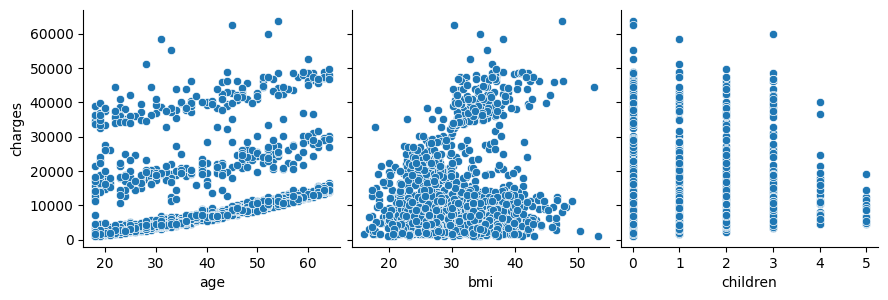

In [ ]:
# sns.pairplot(data = data, kind = 'scatter')
sns.pairplot(data = data, x_vars=['age', 'bmi', 'children'], y_vars=['charges'], kind = 'scatter', height = 3)

2. Assumption - Homoscedasticiy

<Axes: ylabel='charges'>

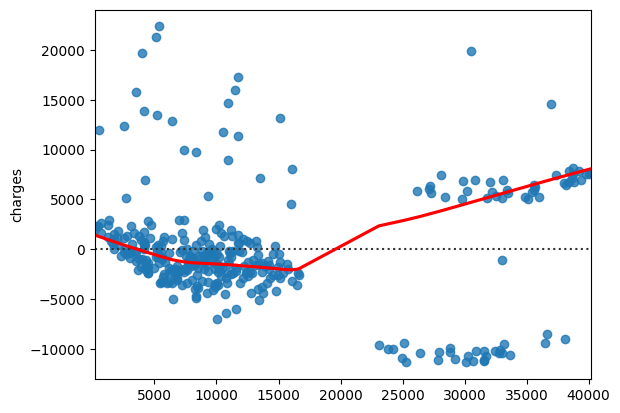

In [ ]:
sns.residplot(x = y_pred, y = y_test, lowess = True, line_kws = {'color': 'red'})

3. Assumption - Normility


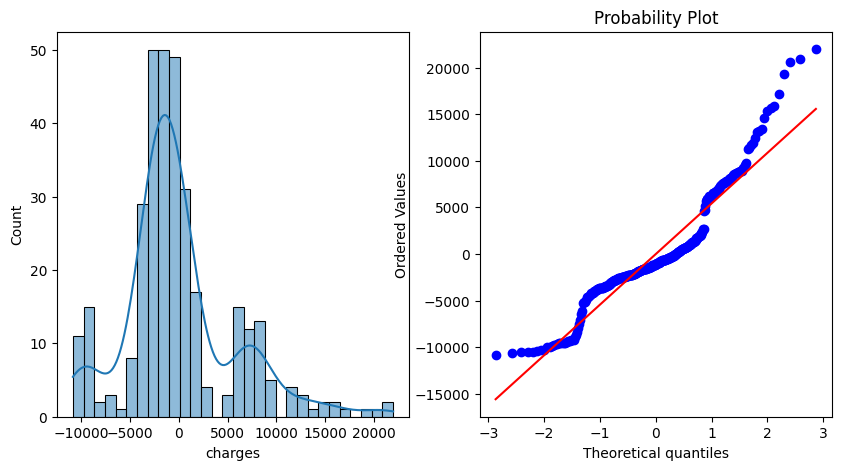


Stats: 0.718, Sig.: 0.000


In [ ]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# Using Histogram
sns.histplot(data = residuals, kde = True, ax = axes[0])
# Using Q-Q plot
stats.probplot(x = residuals, dist = 'norm', plot = plt)
plt.show()

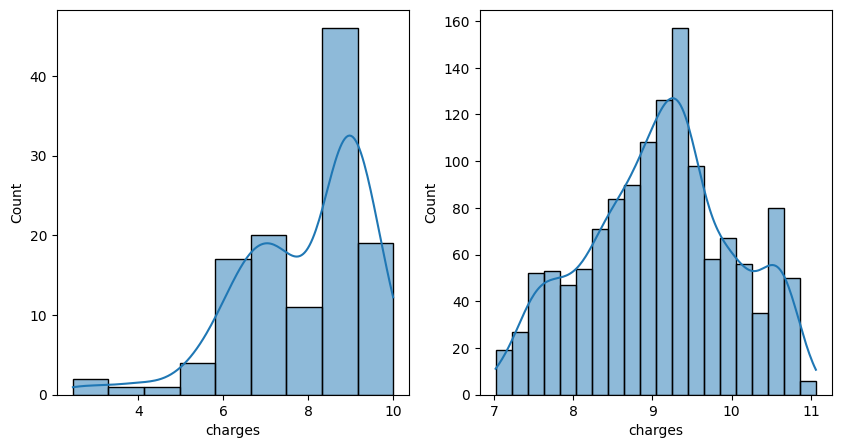


Stats: 0.718, Sig.: 0.000


In [ ]:
# Addressing skewness of data
log_residuals = np.log(residuals)
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# Using Histogram
sns.histplot(data = log_residuals, kde = True, ax = axes[0])
# # Using Q-Q plot
# stats.probplot(x = log_residuals, dist = 'norm', plot = plt)
sns.histplot(data = np.log(y), bins = 20, kde = True, ax = axes[1])
plt.show()

In [ ]:
# Shapiro-Wilk Test
stats, p_value = shapiro(x)
print(f'\nStats: {stats:.3f}, Sig.: {p_value:.3f}')


Stats: 0.718, Sig.: 0.000


4. Assumption - Auto correlation

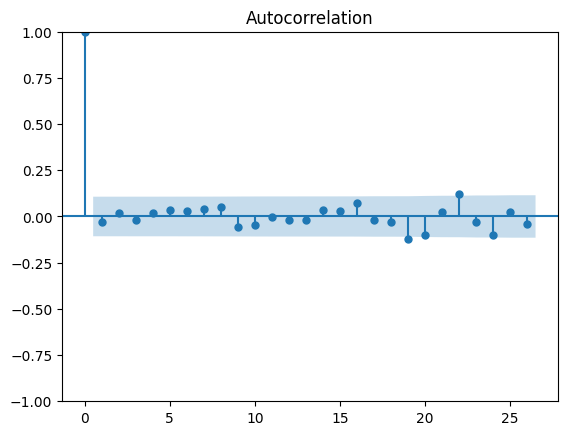

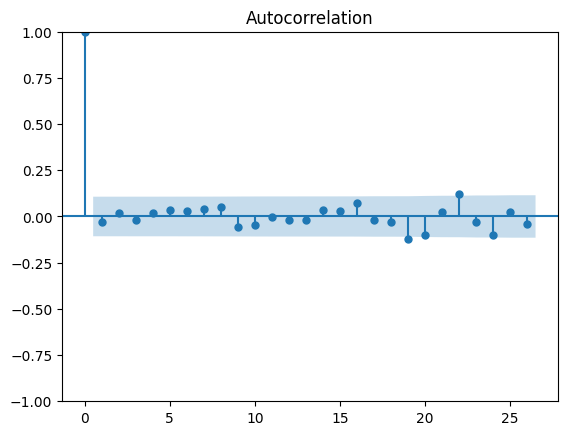

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)

5. Assumption - No Perfect Multicolinearity

<Axes: >

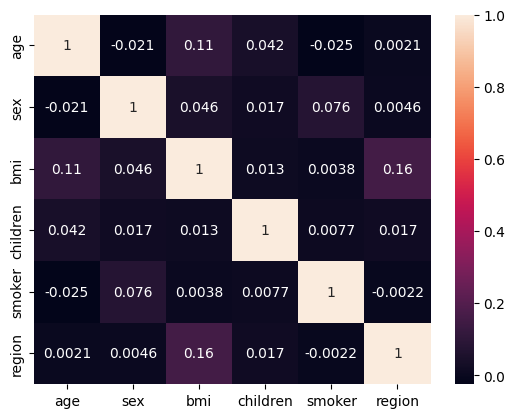

In [ ]:
corr = x.corr(method='pearson')
sns.heatmap(data = corr, annot = True)

In [ ]:
# Evaluate the Model
R2_Score_LR = r2_score(y_test, y_pred)
print(f'R2 Score: {R2_Score_LR}')


R2 Score: 0.7962732059725786


Ridge and Lasso Regression.

In [ ]:
scalar = StandardScaler()
Scaled_X_train = scalar.fit_transform(X_train)
Scaled_X_test = scalar.fit_transform(X_test)

In [ ]:
# Ridge Regression Model
ridgeReg = Ridge(alpha = 1.0)
ridgeReg.fit(Scaled_X_train, y_train)
ridgeReg_Predict = ridgeReg.predict(Scaled_X_test)
r2_lasso = r2_score(y_test, ridgeReg_Predict)
print(f'R2 Ridge Prediction:{r2_lasso}')

R2 Ridge Prediction:0.7955675732635511


In [ ]:
# Lasso Regression Model
lasso = Lasso(alpha = 1.0)
lasso.fit(Scaled_X_train, y_train)
lasso_Predict = lasso.predict(Scaled_X_test)
r2_lasso = r2_score(y_test, lasso_Predict)
print(f'R2 Lasso Prediction:{r2_lasso}')

R2 Lasso Prediction:0.7956392297046472


Stochastic Gradient Descent


In [ ]:
# Stochastic Gradient Descent
SGDModel = SGDRegressor(loss = 'squared_error', penalty = None, tol = 1e-3)
SGDModel.fit(Scaled_X_train, y_train)
SGD_Predict = SGDModel.predict(Scaled_X_test)

In [ ]:
r2_SGD = r2_score(y_test, SGD_Predict)
print(f'R2 SGD Prediction:{r2_SGD}')

R2 SGD Prediction:0.7959304155020818


Testing Models

In [ ]:
sample_data = {
    'age':[56, 51, 31, 64, 44, 43, 56],
    'sex':[1, 0, 1, 1, 0, 1, 1],
    'bmi':[19.95, 18.05, 34.39, 25.6, 23.98, 32.6, 33.725],
    'children':[0, 0, 3, 2, 2, 2, 0],
    'smoker':[1, 0, 1, 0, 0, 0, 0],
    'region':[0, 1, 1, 3, 2, 3, 1]
}
X_test_Sample = pd.DataFrame(sample_data)
output = pd.DataFrame(sample_data)

In [ ]:
# LR Model
LR_Predict_Sample = LR.predict(X_test_Sample)
output['LR Predict'] = LR_Predict_Sample

In [ ]:
# Ridge Regression
ridgeReg_Predict_Sample = ridgeReg.predict(X_test_Sample)
output['RidgeR Predict'] = ridgeReg_Predict_Sample

In [ ]:
# Lasso Regression
lasso_Predict_Sample = lasso.predict(X_test_Sample)
output['Lasso Predict'] = lasso_Predict_Sample

In [ ]:
# Stochastic Gradient Descent
SGD_Predict_Sample = SGDModel.predict(X_test_Sample)
output['SGD Predict'] = SGD_Predict_Sample

In [ ]:
output

,age,sex,bmi,children,smoker,region,LR Predict,RidgeR Predict,Lasso Predict,SGD Predict
0,56,1,19.950,0,1,0,32816.225328,259742.733906,259930.250905,262651.438350
1,51,0,18.050,0,0,1,7003.050939,228486.363864,228651.325140,231134.473437
2,31,1,34.390,3,1,1,32224.399476,202093.192450,202215.811263,205192.216313
3,64,1,25.600,2,0,3,12919.255369,289718.184059,289925.496713,293222.312057
4,44,0,23.980,2,0,2,7723.028636,216495.753055,216643.525294,219324.266910
5,43,1,32.600,2,0,3,9918.140028,229929.962818,230080.451048,233253.527119
6,56,1,33.725,0,0,1,13320.563512,277579.291011,277769.138057,281341.052914


Export to Excel

In [ ]:
output.to_excel('/content/drive/MyDrive/output.xlsx', index = True)